# Preprocess

In [155]:
import pandas as pd
df = pd.read_csv('./statcast-2019-10-03.csv.gz')

In [156]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,CU,2019-03-29,76.0,-0.4801,6.0773,Greg Holland,592626,518813,field_out,hit_into_play,NaN,NaN,NaN,NaN,13.0,Joc Pederson flies out to center fielder Jarro...,R,L,R,LAD,ARI,X,8.0,fly_ball,0,0,2019,0.3711,-0.7988,-1.0991,2.2985,NaN,NaN,NaN,2,13,Bot,119.42,86.48,NaN,NaN,488671.0,NaN,190330_081522,-1.8927,-110.5357,0.4584,3.2541,18.4597,-38.8313,3.4102,1.6270,268.0,75.0,31.9,74.697,2207.0,5.213,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,55.2863,0.2,0.191,0.0,1.0,0.0,0.0,3.0,117,1,Curveball,4,5,4,5,5,4,4,5,Infield shift,Standard
1,FF,2019-03-29,91.6,-0.1543,6.0186,Greg Holland,608369,518813,strikeout,called_strike,NaN,NaN,NaN,NaN,7.0,Corey Seager called out on strikes.,R,L,R,LAD,ARI,S,2.0,NaN,2,2,2019,0.1295,1.2974,-0.4304,1.6186,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081425,-0.9714,-133.2657,-8.0137,1.7375,27.8391,-15.3398,3.4110,1.4728,NaN,NaN,NaN,91.451,2299.0,6.148,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.3518,NaN,NaN,0.0,1.0,0.0,0.0,NaN,116,7,4-Seam Fastball,4,5,4,5,5,4,4,5,Strategic,Standard
2,FF,2019-03-29,91.6,-0.0635,6.0430,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,2,2,2019,0.1645,1.0901,0.1130,2.4574,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081347,0.0932,-133.3608,-5.5498,1.9385,27.2213,-18.2800,3.2441,1.6270,NaN,NaN,NaN,91.644,2242.0,6.173,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.3262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,6,4-Seam Fastball,4,5,4,5,5,4,4,5,Strategic,Standard
3,CU,2019-03-29,78.5,-0.1468,6.1098,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,8.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,2,2,2019,0.3092,-0.8086,-0.1968,1.8480,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081310,-0.6518,-114.3201,-0.9786,2.7560,19.8501,-39.1588,3.3269,1.6270,180.0,81.4,61.6,77.622,2365.0,5.490,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,55.0094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,5,Curveball,4,5,4,5,5,4,4,5,Strategic,Standard
4,CU,2019-03-29,79.0,-0.3110,6.1743,Greg Holland,608369,518813,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,LAD,ARI,B,NaN,NaN,1,2,2019,0.3301,-0.7511,-1.4010,2.0951,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081234,-2.9316,-114.9656,-0.7759,3.3693,19.6924,-38.7999,3.4251,1.4640,NaN,NaN,NaN,78.268,2402.0,5.599,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.0,54.9010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,4,Curveball,4,5,4,5,5,4,4,5,Strategic,Standard
5,FF,2019-03-29,90.5,-0.1803,6.1012,Greg Holland,608369,518813,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,LAD,ARI,S,NaN,NaN,1,1,2019,0.2944,1.2062,-0.2482,2.3664,NaN,NaN,NaN,1,13,Bot,NaN,NaN,NaN,NaN,488671.0,NaN,190330_081150,-0.7733,-131.7278,-5.8817,3.5241,25.7802,-17.4335,3.3711,1.6270,119.0,74.9,10.4,89.889,2246.0,5.723,565800,518813,488671.0,571875.0,606466.0,500871.0,605113.0,444482.0,502481.0,430945.

In [157]:
player_ids = pd.read_excel('~/Downloads/SFBB-Player-ID-Map.xlsx')

player_ids = player_ids[['MLBID', 'MLBNAME', 'IDPLAYER']]

batter_ids = player_ids.copy()
batter_ids.columns = [f'batter_{c.lower()}' for c in batter_ids.columns]

pitcher_ids = player_ids.copy()
pitcher_ids.columns = [f'pitcher_{c.lower()}' for c in pitcher_ids.columns]

df = df.merge(batter_ids, left_on='batter', right_on='batter_mlbid', how='left')
df = df.merge(pitcher_ids, left_on='pitcher', right_on='pitcher_mlbid', how='left')
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,batter_mlbid,batter_mlbname,batter_idplayer,pitcher_mlbid,pitcher_mlbname,pitcher_idplayer
0,CU,2019-03-29,76.0,-0.4801,6.0773,Greg Holland,592626,518813,field_out,hit_into_play,...,4,5,Infield shift,Standard,592626.0,Joc Pederson,pederjo01,518813.0,Greg Holland,hollagr01
1,FF,2019-03-29,91.6,-0.1543,6.0186,Greg Holland,608369,518813,strikeout,called_strike,...,4,5,Strategic,Standard,608369.0,Corey Seager,seageco01,518813.0,Greg Holland,hollagr01
2,FF,2019-03-29,91.6,-0.0635,6.0430,Greg Holland,608369,518813,NaN,foul,...,4,5,Strategic,Standard,608369.0,Corey Seager,seageco01,518813.0,Greg Holland,hollagr01
3,CU,2019-03-29,78.5,-0.1468,6.1098,Greg Holland,608369,518813,NaN,foul,...,4,5,Strategic,Standard,608369.0,Corey Seager,seageco01,518813.0,Greg Holland,hollagr01
4,CU,2019-03-29,79.0,-0.3110,6.1743,Greg Holland,608369,518813,NaN,ball,...,4,5,Strategic,Standard,608369.0,Corey Seager,seageco01,518813.0,Greg Holland,hollagr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720593,FF,2019-09-10,97.1,-1.8718,5.8655,Zack Wheeler,606466,554430,NaN,ball,...,0,0,Standard,Standard,606466.0,Ketel Marte,marteke01,554430.0,Zack Wheeler,wheelza01
720594,FC,2019-09-10,91.7,-1.7703,6.1359,Edwin Jackson,650402,429719,NaN,foul_tip,...,0,0,Infield shift,Standard,650402.0,Gleyber Torres,torregl01,429719.0,Edwin Jackson,jacksed01
720595,SI,2019-09-10,90.0,2.9095,6.2995,Ty Blach,572041,621389,NaN,foul,...,0,0,Infield shift,Standard,572041.0,A.J. Pollock,polloaj01,621389.0,Ty Blach,blachty01
720596,FF,2019-09-10,92.2,-2.0794,6.0123,Chi Chi Gonzalez,451594,592346,NaN,called_strike,...,0,0,Infield shift,Standard,451594.0,Dexter Fowler,fowlede01,592346.0,Chi Chi Gonzalez,gonzach01


In [158]:
df['batter_mlbname'].fillna('unknown', inplace=True)
df['pitcher_mlbname'].fillna('unknown', inplace=True)

In [159]:
df.shape

(720598, 95)

In [160]:
on_base_events = [
    'single',
    'double',
    'triple',
    'home_run',
    'walk',
]

df['is_on_base_event'] = df.events.isin(on_base_events).astype(int)

In [161]:
d = (df
    .sort_values(['game_pk', 'at_bat_number', 'pitch_number'])
    .groupby(['game_pk', 'at_bat_number'])
    .tail(1)
)[['batter_mlbname', 'pitcher_mlbname', 'is_on_base_event']]

In [162]:
d.is_on_base_event.mean()

0.30697359660325046

In [163]:
d.head()

,batter_mlbname,pitcher_mlbname,is_on_base_event
4949,Shin-Soo Choo,Matt Harvey,0
4917,Rougned Odor,Matt Harvey,0
4885,Elvis Andrus,Matt Harvey,1
4874,Joey Gallo,Matt Harvey,1
4840,Asdrubal Cabrera,Matt Harvey,1


# Model Inputs

In [164]:
d = d.groupby(['batter_mlbname', 'pitcher_mlbname']).agg({'is_on_base_event': ['sum', 'size']})
d

is_on_base_event      
                                             sum  size
batter_mlbname pitcher_mlbname                        
A.J. Pollock   Adam Ottavino                   1     2
               Alex Claudio                    0     2
               Andrew Chafin                   1     1
               Andrew Kittredge                1     1
               Anibal Sanchez                  0     3
...                                          ...   ...
unknown        Zach Eflin                     16    62
               Zack Godley                    11    35
               Zack Greinke                   16    71
               Zack Wheeler                   14    61
               unknown                      1259  4008

[55302 rows x 2 columns]

In [165]:
d = pd.concat([d['is_on_base_event']['sum'], d['is_on_base_event']['size']], axis=1).reset_index()

In [166]:
d.rename({'sum': 'on_base', 'size': 'appearances'}, axis=1, inplace=True)
d

,batter_mlbname,pitcher_mlbname,on_base,appearances
0,A.J. Pollock,Adam Ottavino,1,2
1,A.J. Pollock,Alex Claudio,0,2
2,A.J. Pollock,Andrew Chafin,1,1
3,A.J. Pollock,Andrew Kittredge,1,1
4,A.J. Pollock,Anibal Sanchez,0,3
...,...,...,...,...
55297,unknown,Zach Eflin,16,62
55298,unknown,Zack Godley,11,35
55299,unknown,Zack Greinke,16,71
55300,unknown,Zack Wheeler,14,61


In [167]:
d = d[~d.batter_mlbname.eq('unknown')]
d = d[~d.pitcher_mlbname.eq('unknown')]
d

,batter_mlbname,pitcher_mlbname,on_base,appearances
0,A.J. Pollock,Adam Ottavino,1,2
1,A.J. Pollock,Alex Claudio,0,2
2,A.J. Pollock,Andrew Chafin,1,1
3,A.J. Pollock,Andrew Kittredge,1,1
4,A.J. Pollock,Anibal Sanchez,0,3
...,...,...,...,...
54798,Zack Wheeler,Spencer Turnbull,2,3
54799,Zack Wheeler,Tanner Roark,1,2
54800,Zack Wheeler,Walker Buehler,0,2
54801,Zack Wheeler,Zac Gallen,0,2


In [168]:
eligible_batters = d.groupby('batter_mlbname').appearances.sum()
eligible_batters = eligible_batters[eligible_batters > 30]
eligible_batters

batter_mlbname
A.J. Pollock     256
A.J. Reed         43
Aaron Altherr     49
Aaron Hicks      212
Aaron Judge      331
                ... 
Zach Eflin        46
Zack Collins      69
Zack Cozart       78
Zack Greinke      55
Zack Wheeler      51
Name: appearances, Length: 508, dtype: int64

In [169]:
d = d[d.batter_mlbname.isin(eligible_batters.index)]
d

,batter_mlbname,pitcher_mlbname,on_base,appearances
0,A.J. Pollock,Adam Ottavino,1,2
1,A.J. Pollock,Alex Claudio,0,2
2,A.J. Pollock,Andrew Chafin,1,1
3,A.J. Pollock,Andrew Kittredge,1,1
4,A.J. Pollock,Anibal Sanchez,0,3
...,...,...,...,...
54798,Zack Wheeler,Spencer Turnbull,2,3
54799,Zack Wheeler,Tanner Roark,1,2
54800,Zack Wheeler,Walker Buehler,0,2
54801,Zack Wheeler,Zac Gallen,0,2


In [170]:
eligible_pitchers = d.groupby('pitcher_mlbname').appearances.sum()
eligible_pitchers = eligible_pitchers[eligible_pitchers > 30]
eligible_pitchers

pitcher_mlbname
A.J. Cole       103
A.J. Minter     129
A.J. Puk         33
Aaron Brooks    432
Aaron Nola      767
               ... 
Zach Duke        99
Zach Eflin      608
Zack Godley     367
Zack Greinke    724
Zack Wheeler    724
Name: appearances, Length: 444, dtype: int64

In [171]:
d = d[d.pitcher_mlbname.isin(eligible_pitchers.index)]
d

,batter_mlbname,pitcher_mlbname,on_base,appearances
0,A.J. Pollock,Adam Ottavino,1,2
1,A.J. Pollock,Alex Claudio,0,2
2,A.J. Pollock,Andrew Chafin,1,1
3,A.J. Pollock,Andrew Kittredge,1,1
4,A.J. Pollock,Anibal Sanchez,0,3
...,...,...,...,...
54798,Zack Wheeler,Spencer Turnbull,2,3
54799,Zack Wheeler,Tanner Roark,1,2
54800,Zack Wheeler,Walker Buehler,0,2
54801,Zack Wheeler,Zac Gallen,0,2


In [172]:
batter_id_map = {n: i for i, n in enumerate(d.batter_mlbname.unique())}
batter_id_map

{'A.J. Pollock': 0,
 'A.J. Reed': 1,
 'Aaron Altherr': 2,
 'Aaron Hicks': 3,
 'Aaron Judge': 4,
 'Aaron Nola': 5,
 'Adalberto Mondesi': 6,
 'Adam Duvall': 7,
 'Adam Eaton': 8,
 'Adam Engel': 9,
 'Adam Frazier': 10,
 'Adam Jones': 11,
 'Adam Wainwright': 12,
 'Addison Russell': 13,
 'Adeiny Hechavarria': 14,
 'Albert Almora': 15,
 'Albert Pujols': 16,
 'Aledmys Diaz': 17,
 'Alex Avila': 18,
 'Alex Blandino': 19,
 'Alex Bregman': 20,
 'Alex Dickerson': 21,
 'Alex Gordon': 22,
 'Amed Rosario': 23,
 'Andrelton Simmons': 24,
 'Andrew Benintendi': 25,
 'Andrew Knapp': 26,
 'Andrew McCutchen': 27,
 'Anibal Sanchez': 28,
 'Anthony DeSclafani': 29,
 'Anthony Rendon': 30,
 'Anthony Rizzo': 31,
 'Anthony Santander': 32,
 'Antonio Senzatela': 33,
 'Asdrubal Cabrera': 34,
 'Austin Barnes': 35,
 'Austin Dean': 36,
 'Austin Hays': 37,
 'Austin Hedges': 38,
 'Austin Meadows': 39,
 'Austin Riley': 40,
 'Austin Romine': 41,
 'Austin Slater': 42,
 'Austin Wynns': 43,
 'Avisail Garcia': 44,
 'Ben Gamel': 

In [173]:
pitcher_id_map = {n: i for i, n in enumerate(d.pitcher_mlbname.unique())}
pitcher_id_map

{'A.J. Cole': 429,
 'A.J. Minter': 336,
 'A.J. Puk': 276,
 'Aaron Brooks': 277,
 'Aaron Nola': 323,
 'Aaron Sanchez': 161,
 'Aaron Wilkerson': 337,
 'Adalberto Mejia': 278,
 'Adam Conley': 338,
 'Adam Morgan': 339,
 'Adam Ottavino': 0,
 'Adam Plutko': 162,
 'Adam Wainwright': 279,
 'Adam Warren': 379,
 'Adrian Sampson': 280,
 'Alec Mills': 263,
 'Alex Claudio': 1,
 'Alex Cobb': 208,
 'Alex Colome': 140,
 'Alex Wilson': 415,
 'Alex Wood': 324,
 'Allen Webster': 380,
 'Amir Garrett': 381,
 'Andrew Cashner': 163,
 'Andrew Chafin': 2,
 'Andrew Heaney': 374,
 'Andrew Kittredge': 3,
 'Andrew Miller': 281,
 'Andrew Suarez': 340,
 'Anibal Sanchez': 4,
 'Anthony Bass': 282,
 'Anthony DeSclafani': 325,
 'Anthony Swarzak': 5,
 'Antonio Senzatela': 6,
 'Archie Bradley': 7,
 'Ariel Jurado': 209,
 'Aroldis Chapman': 283,
 'Asher Wojciechowski': 210,
 'Austin Brice': 8,
 'Austin Pruitt': 284,
 'Blaine Hardy': 141,
 'Blake Parker': 142,
 'Blake Snell': 9,
 'Blake Treinen': 411,
 'Brad Boxberger': 211,

In [174]:
d['batter_id'] = d.batter_mlbname.map(batter_id_map)
d['pitcher_id'] = d.pitcher_mlbname.map(pitcher_id_map)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dgates/venvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
d.head()

,batter_mlbname,pitcher_mlbname,on_base,appearances,batter_id,pitcher_id
0,A.J. Pollock,Adam Ottavino,1,2,0,0
1,A.J. Pollock,Alex Claudio,0,2,0,1
2,A.J. Pollock,Andrew Chafin,1,1,0,2
3,A.J. Pollock,Andrew Kittredge,1,1,0,3
4,A.J. Pollock,Anibal Sanchez,0,3,0,4


In [176]:
obp = d.groupby('batter_mlbname').apply(lambda x: x.on_base.sum() / x.appearances.sum())
obp

batter_mlbname
A.J. Pollock     0.321569
A.J. Reed        0.186047
Aaron Altherr    0.122449
Aaron Hicks      0.334906
Aaron Judge      0.375000
                   ...   
Zach Eflin       0.130435
Zack Collins     0.250000
Zack Cozart      0.102564
Zack Greinke     0.290909
Zack Wheeler     0.235294
Length: 508, dtype: float64

In [177]:
obp[batter_name_lookup[1]]

0.18604651162790697

In [178]:
batter_name_lookup = {v: k for k, v in batter_id_map.items()}
obps = np.array([obp[batter_name_lookup[i]] for i in range(len(batter_id_map))])

In [179]:
batter_index = d.batter_id.values
pitcher_index = d.pitcher_id.values
n = d.appearances.values
y_obs = d.on_base.values
y_obs = np.stack([y_obs, n-y_obs], axis=1)
n = np.stack([n, n], axis=1)

In [180]:
n.shape

(52243, 2)

# Model

In [181]:
# 7 / ((1 / obps) - 1)

In [208]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T


def dirichlet(a):
    # reshaping for broadcasting
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    p_mu_prior = 7
    b_mu = p_mu_prior / ((1 / obps) - 1)
    p_mu, p_sd = pm.Normal('p_mu', p_mu_prior, 1), pm.HalfNormal('p_sd', 1)
    W_b = pm.HalfNormal('W_b', b_mu * (np.sqrt(2) / np.sqrt(3.14)), shape=len(batter_id_map))
    W_p = pm.Normal('W_p', p_mu, p_sd, shape=len(pitcher_id_map))

    matchups = T.stack([b_mu[batter_index], W_p[pitcher_index]]).T
    p = dirichlet(matchups)
    
    y_hat = pm.Binomial('y_hat', p=p, n=n, observed=y_obs, total_size=len(y_obs))
    
    trace = pm.sample(500, cores=1, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [W_p, W_b, p_sd, p_mu]
100%|██████████| 1000/1000 [02:39<00:00,  6.28it/s]


In [199]:
for rv in model.free_RVs:
    print(rv.name, rv.logp(model.test_point))

b_sd_log__ -0.7698925914732455
p_mu 1.3836465597893728
p_sd_log__ -0.7698925914732455
W_b 817.594459516529
W_p 714.5904331207437


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a7b909e8>,
      dtype=object)

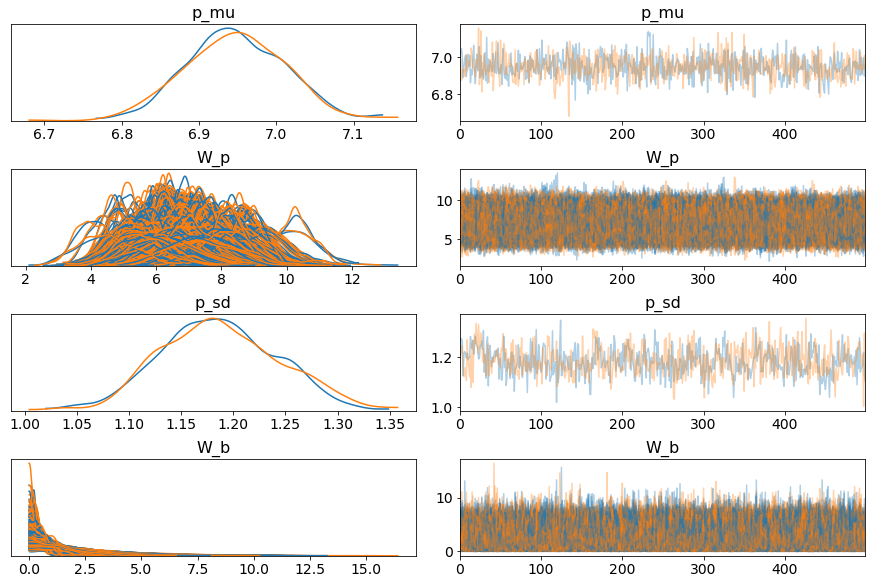

In [209]:
pm.plots.traceplot(trace, compact=True)

In [214]:
pitcher_name_lookup = {v: k for k, v in pitcher_id_map.items()}
sorted([(a, pitcher_name_lookup[i]) for i, a in enumerate(trace['W_p'].std(axis=0))])

[(0.3288878125951776, 'Ivan Nova'),
 (0.3313655013874713, 'Reynaldo Lopez'),
 (0.341079799693758, 'Dakota Hudson'),
 (0.3462216134874701, 'Martin Perez'),
 (0.3490781370579834, 'Trevor Bauer'),
 (0.34991455097094104, 'Max Fried'),
 (0.35302054435860963, 'Jake Junis'),
 (0.35320375080457134, 'Adam Wainwright'),
 (0.35604191266864355, 'Jon Lester'),
 (0.35633293157080237, 'Antonio Senzatela'),
 (0.35867096984156194, 'Eduardo Rodriguez'),
 (0.36011048505059734, 'Robbie Ray'),
 (0.36193158788669966, 'Merrill Kelly'),
 (0.36379485333858624, 'Aaron Nola'),
 (0.3648242415051081, 'Jose Quintana'),
 (0.3664081708211661, 'Tanner Roark'),
 (0.36759573274923246, 'Brad Keller'),
 (0.37028840406819136, 'Sandy Alcantara'),
 (0.3706430832053589, 'Brett Anderson'),
 (0.372840680990463, 'Jon Gray'),
 (0.37430901036644415, 'Eric Lauer'),
 (0.3771516123568429, 'Jason Vargas'),
 (0.37906437660049, 'Jorge Lopez'),
 (0.3809481820109639, 'Masahiro Tanaka'),
 (0.38203533428673153, 'Kyle Gibson'),
 (0.382367554

In [ ]:
estimated_abilities = trace['beta'][-1000:].mean(axis=0)
estimated_abilities_error = trace['beta'][-1000:].std(axis=0)

In [ ]:
batter_id_lookup = {v: k for k, v in batter_map.items()}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

limit = 30
n_batters = len(batter_map)
center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([batter_id_lookup[i] for i in range(n_batters)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])[-limit:]
values, labels, errors = zip(*tmp)
labels = [f'{i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Offensive Ranking (estimate +/- 1 s.e.)', y=1.05)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

center_line = np.mean(estimated_abilities)
values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: rankings.set_index('team').loc[x[1], 'score'])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

reverse_team_id_lookup = {v: k for k, v in team_id_lookup.items()}
divisions = json.load(open('divisions.json'))
divisions

def plot_division_rankings(divisions):
    fig, axs = plt.subplots(len(divisions) // 2, 2, figsize=(15, 10))

    for (division, teams), ax in zip(divisions.items(), axs.reshape(-1)):

        team_ids = np.array([reverse_team_id_lookup[team] for team in teams])
        division_abilities = estimated_abilities[team_ids]
        division_error = estimated_abilities_error[team_ids]

        center_line = np.mean(division_abilities)
        values = list(reversed(division_abilities))
        labels = list(reversed([team_id_lookup[id] for id in team_ids]))
        errors = list(reversed(division_error))
        
        tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
        values, labels, errors = zip(*tmp)

        # plot error bars
        ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

        # label the y-axis
        ax.set_yticks(range(len(labels)))
        ax.set_yticklabels(labels, ha='right')
        ax.tick_params(axis='y', which='both', left=False)

        # give it a reference line
        ax.axvline(center_line, linestyle='--', color='k')

        # Move x axis to top
        ax.xaxis.tick_top()

        # polish it off with a title
        _ = ax.set_title(f'{division} Team Quality Estimates', y=1.15)
        
    # remove borders
    sns.despine(left=True, bottom=True, top=False)
    plt.subplots_adjust(
        left  = 0.125,  # the left side of the subplots of the figure
        right = 0.9,    # the right side of the subplots of the figure
        bottom = 0.1,   # the bottom of the subplots of the figure
        top = 0.9,      # the top of the subplots of the figure
        wspace = 0.25,   # the amount of width reserved for space between subplots,
                        # expressed as a fraction of the average axis width
        hspace = 0.8,   # the amount of height reserved for space between subplots,
                        # expressed as a fraction of the average axis height
    )
        
plot_division_rankings(divisions)

In [ ]:
import collections
leagues = collections.defaultdict(list)
for division, teams in divisions.items():
    leagues[division[:3]].extend(teams)
plot_division_rankings(leagues)

# Odds of RedSox winning world series

In [ ]:
dodgers_id, red_sox_id = team_ids['LAD'], team_ids['BOS']

In [ ]:
# team1 @ team2
games = [
    (dodgers_id, red_sox_id),
    (dodgers_id, red_sox_id),
    (red_sox_id, dodgers_id),
    (red_sox_id, dodgers_id),
    (red_sox_id, dodgers_id),
    (dodgers_id, red_sox_id),
    (dodgers_id, red_sox_id),
]
away_team_id, home_team_id = zip(*games)
world_series_n_matchups = np.ones((len(games), 2), dtype=int)
world_series_home_team_id = np.array(home_team_id)
world_series_away_team_id = np.array(away_team_id)

In [ ]:
shared_n_matchups.set_value(world_series_n_matchups)
shared_home_team_id.set_value(world_series_home_team_id)
shared_away_team_id.set_value(world_series_away_team_id)

In [ ]:
ppc = pm.sample_ppc(trace, model=model, samples=100)

In [ ]:
p = ppc['wins']
p.shape

In [ ]:
red_sox_wins = p[:, np.arange(7), [0, 0, 1, 1, 1, 0, 0]]
red_sox_wins.shape

In [ ]:
red_sox_wins

In [ ]:
def simulate():
    ppc = pm.sample_ppc(trace, model=model, samples=100, progressbar=False)
    red_sox_wins = ppc['wins'][:, np.arange(7), [0, 0, 1, 1, 1, 0, 0]]
    red_sox_victory = dodgers_victory = 0
    for series in red_sox_wins:
        w_red_sox = w_dodgers = 0
        for game in series:
            w_red_sox += game
            w_dodgers += 1 - game
            if w_red_sox == 4 or w_dodgers == 4:
                red_sox_victory += int(w_red_sox > w_dodgers)
                dodgers_victory += int(w_dodgers > w_red_sox)
                break
    return red_sox_victory, dodgers_victory

In [ ]:
import tqdm
simulations = np.array([simulate() for _ in tqdm.tqdm_notebook(range(1000))])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
p_red_sox_win = simulations[:, 0] / 100
sns.distplot(p_red_sox_win)

In [ ]:
lb = np.quantile(p_red_sox_win, q=0.025)
median = np.median(p_red_sox_win)
ub = np.quantile(p_red_sox_win, q=0.975)
lb, median, ub

# Acknowledgement and additional resources

This post was particulary inspired by a few of Andrew Gelman's blog posts in which he [ranked world cup teams](https://andrewgelman.com/2014/07/15/stan-world-cup-update/). You can find a Python implementation of his world cup model on my [githup repo](https://github.com/dantegates/world-cup/blob/master/World%20cup.ipynb). The model in this post bears some resemblance to Gelman's world cup model with a few differences noted here

- Gelman models the difference in goals scored by each team in a given game whereas we'll model the number of wins a team earns in a series. Thus our response variables belong to different distributions.
- Gelman uses [FiveThirtyEight](https://fivethirtyeight.com/) soccer rankings in his model as prior. We didn't use rankings in this fashion but we did use FiveThirtyEight's published [Elo](https://en.wikipedia.org/wiki/Elo_rating_system) scores to compare against our learned rankings.

Additionally the data pull and other useful features such as code and evaluations of the model fit were not included in this post to keep it slim. You can find the entire notebook behind this post [here](https://github.com/dantegates/mlb-statcast/blob/master/bayesian-ranking-full.ipynb).